In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/california-housing/housing.csv


**IMPORTING NECESSARY LIBRARIES***

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**READING OUR DATASET**

In [3]:
data = pd.read_csv("/kaggle/input/california-housing/housing.csv")

**PRINTING OUR DATA**

In [4]:
data


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


> **REMOVING NULL VALUES**

In [6]:
data.dropna(inplace = True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [8]:
from sklearn.model_selection import train_test_split
X  = data.drop(['median_house_value'] , axis= 1)
y = data['median_house_value']

 # **DATA EXPLORATION**

In [9]:
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY


## **SPLITTING OUR DATASET**

In [10]:
X_train, X_test, y_train , y_test = train_test_split(X,  y, test_size = 0.2)
#TAKING THE TESTING DATA TO BE 20 % OF OUR ORIGINAL DATA

In [11]:
train_data = X_train.join(y_train)

In [12]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
8126,-118.18,33.81,27.0,471.0,132.0,315.0,96.0,1.7500,NEAR OCEAN,154200.0
14750,-117.06,32.57,25.0,1268.0,282.0,991.0,299.0,3.0284,NEAR OCEAN,123600.0
1478,-122.04,37.97,39.0,1323.0,245.0,705.0,261.0,3.1968,NEAR BAY,151000.0
18276,-122.07,37.34,35.0,1172.0,184.0,512.0,175.0,7.3561,<1H OCEAN,500001.0
15252,-117.32,33.01,29.0,3584.0,712.0,1619.0,667.0,4.1250,NEAR OCEAN,394400.0
...,...,...,...,...,...,...,...,...,...,...
1197,-121.65,39.32,40.0,812.0,154.0,374.0,142.0,2.7891,INLAND,73500.0
10900,-117.84,33.74,25.0,1818.0,577.0,1426.0,532.0,3.2104,<1H OCEAN,112500.0
13778,-117.06,34.02,24.0,3912.0,809.0,1926.0,762.0,2.6875,INLAND,116300.0
12814,-121.50,38.62,8.0,16679.0,3457.0,7919.0,3329.0,3.7188,INLAND,134500.0


# **UNDERSTANDING GENERAL TRENDS AND PATTERNS IN OUR DATA**

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

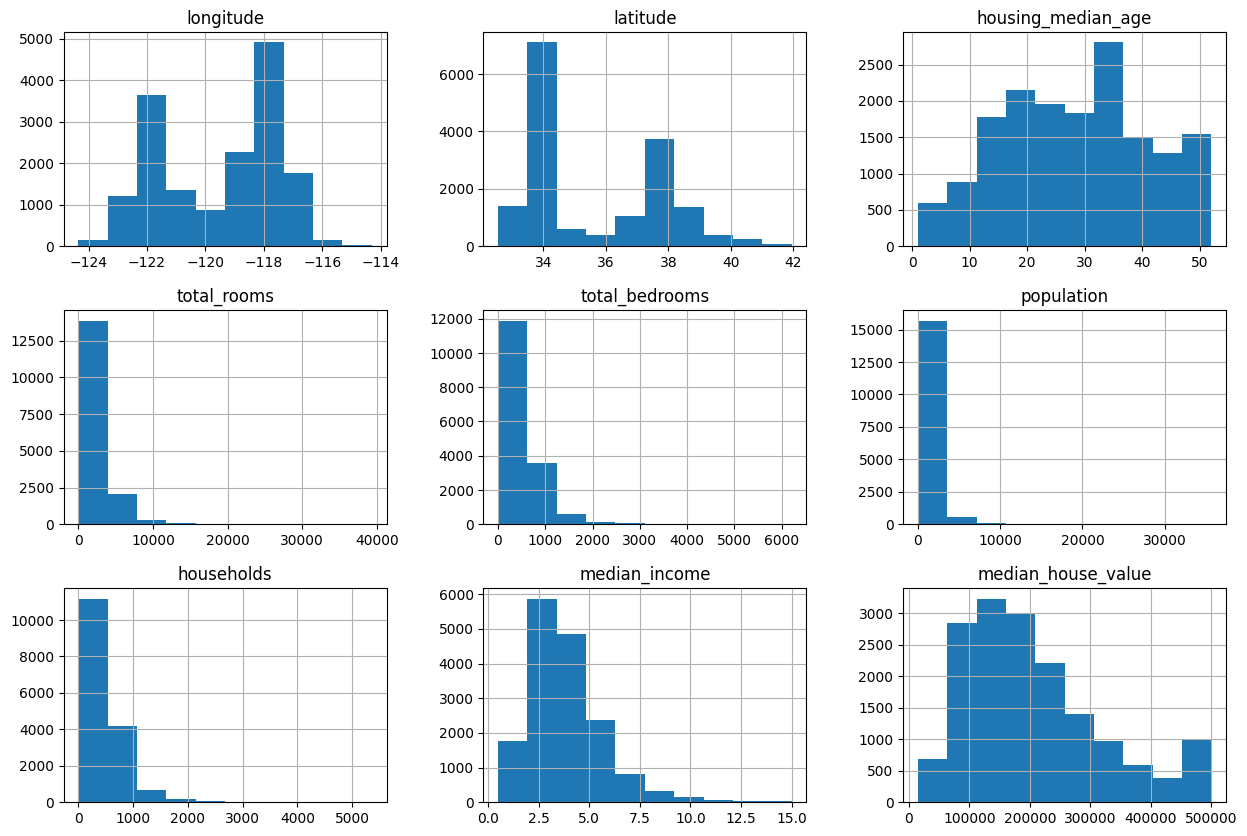

In [13]:
train_data.hist(figsize= (15,10))

# Preprocessing

# **MAKING OUR  DATA MORE "MACHINE FREINDLY" 😊**

In [14]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] +1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] +1)
train_data['population'] = np.log(train_data['population'] +1)
train_data['households'] = np.log(train_data['households'] +1)

In [15]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
8126,-118.18,33.81,27.0,6.156979,4.890349,5.755742,4.574711,1.7500,NEAR OCEAN,154200.0
14750,-117.06,32.57,25.0,7.145984,5.645447,6.899723,5.703782,3.0284,NEAR OCEAN,123600.0
1478,-122.04,37.97,39.0,7.188413,5.505332,6.559615,5.568345,3.1968,NEAR BAY,151000.0
18276,-122.07,37.34,35.0,7.067320,5.220356,6.240276,5.170484,7.3561,<1H OCEAN,500001.0
15252,-117.32,33.01,29.0,8.184514,6.569481,7.390181,6.504288,4.1250,NEAR OCEAN,394400.0
...,...,...,...,...,...,...,...,...,...,...
1197,-121.65,39.32,40.0,6.700731,5.043425,5.926926,4.962845,2.7891,INLAND,73500.0
10900,-117.84,33.74,25.0,7.506042,6.359574,7.263330,6.278521,3.2104,<1H OCEAN,112500.0
13778,-117.06,34.02,24.0,8.272060,6.697034,7.563720,6.637258,2.6875,INLAND,116300.0
12814,-121.50,38.62,8.0,9.721966,8.148446,8.977146,8.110728,3.7188,INLAND,134500.0


In [16]:
train_data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'median_house_value'],
      dtype='object')

# **CONVERTING THE COLUMN "OCEAN PROXIMITY" INTO MORE RELIABLE ATTRIBUTE OF OUR DATASET FOR BETTER TRAINING OF OUR MODEL**

# USING ONE - HOT ENCODING

In [17]:
import pandas as pd

# Assuming train_data is your DataFrame

# One-hot encode 'ocean_proximity' and replace boolean values with integers
train_data = train_data.join(pd.get_dummies(train_data['ocean_proximity'])).drop(['ocean_proximity'], axis=1)

In [18]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
8126,-118.18,33.81,27.0,6.156979,4.890349,5.755742,4.574711,1.7500,154200.0,False,False,False,False,True
14750,-117.06,32.57,25.0,7.145984,5.645447,6.899723,5.703782,3.0284,123600.0,False,False,False,False,True
1478,-122.04,37.97,39.0,7.188413,5.505332,6.559615,5.568345,3.1968,151000.0,False,False,False,True,False
18276,-122.07,37.34,35.0,7.067320,5.220356,6.240276,5.170484,7.3561,500001.0,True,False,False,False,False
15252,-117.32,33.01,29.0,8.184514,6.569481,7.390181,6.504288,4.1250,394400.0,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1197,-121.65,39.32,40.0,6.700731,5.043425,5.926926,4.962845,2.7891,73500.0,False,True,False,False,False
10900,-117.84,33.74,25.0,7.506042,6.359574,7.263330,6.278521,3.2104,112500.0,True,False,False,False,False
13778,-117.06,34.02,24.0,8.272060,6.697034,7.563720,6.637258,2.6875,116300.0,False,True,False,False,False
12814,-121.50,38.62,8.0,9.721966,8.148446,8.977146,8.110728,3.7188,134500.0,False,True,False,False,False


# **REPLACING BOOLEAN VALUES(TRUE/ FALSE) WITH INTEGERS****

In [19]:
for col in train_data.select_dtypes(include=bool).columns:
    train_data[col].replace({False: 0, True: 1}, inplace=True)

/tmp/ipykernel_18/2912464063.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data[col].replace({False: 0, True: 1}, inplace=True)
/tmp/ipykernel_18/2912464063.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_data[col].replace({False: 0, True: 1}, inplace=True)


In [20]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
8126,-118.18,33.81,27.0,6.156979,4.890349,5.755742,4.574711,1.7500,154200.0,0,0,0,0,1
14750,-117.06,32.57,25.0,7.145984,5.645447,6.899723,5.703782,3.0284,123600.0,0,0,0,0,1
1478,-122.04,37.97,39.0,7.188413,5.505332,6.559615,5.568345,3.1968,151000.0,0,0,0,1,0
18276,-122.07,37.34,35.0,7.067320,5.220356,6.240276,5.170484,7.3561,500001.0,1,0,0,0,0
15252,-117.32,33.01,29.0,8.184514,6.569481,7.390181,6.504288,4.1250,394400.0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1197,-121.65,39.32,40.0,6.700731,5.043425,5.926926,4.962845,2.7891,73500.0,0,1,0,0,0
10900,-117.84,33.74,25.0,7.506042,6.359574,7.263330,6.278521,3.2104,112500.0,1,0,0,0,0
13778,-117.06,34.02,24.0,8.272060,6.697034,7.563720,6.637258,2.6875,116300.0,0,1,0,0,0
12814,-121.50,38.62,8.0,9.721966,8.148446,8.977146,8.110728,3.7188,134500.0,0,1,0,0,0


In [21]:
# Replace boolean values with integers explicitly without triggering the warning
# train_data['ocean_proximity'] = train_data['ocean_proximity'].replace({True: 1, False: 0})
# train_data = train_data.infer_objects(copy=False)

In [22]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
8126,-118.18,33.81,27.0,6.156979,4.890349,5.755742,4.574711,1.7500,154200.0,0,0,0,0,1
14750,-117.06,32.57,25.0,7.145984,5.645447,6.899723,5.703782,3.0284,123600.0,0,0,0,0,1
1478,-122.04,37.97,39.0,7.188413,5.505332,6.559615,5.568345,3.1968,151000.0,0,0,0,1,0
18276,-122.07,37.34,35.0,7.067320,5.220356,6.240276,5.170484,7.3561,500001.0,1,0,0,0,0
15252,-117.32,33.01,29.0,8.184514,6.569481,7.390181,6.504288,4.1250,394400.0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1197,-121.65,39.32,40.0,6.700731,5.043425,5.926926,4.962845,2.7891,73500.0,0,1,0,0,0
10900,-117.84,33.74,25.0,7.506042,6.359574,7.263330,6.278521,3.2104,112500.0,1,0,0,0,0
13778,-117.06,34.02,24.0,8.272060,6.697034,7.563720,6.637258,2.6875,116300.0,0,1,0,0,0
12814,-121.50,38.62,8.0,9.721966,8.148446,8.977146,8.110728,3.7188,134500.0,0,1,0,0,0


In [23]:
train_data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', '<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY',
       'NEAR OCEAN'],
      dtype='object')

# **ADDING ADDITIONAL HELPFUL FEATURES IN OUR MODEL**

In [24]:
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']

In [25]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
8126,-118.18,33.81,27.0,6.156979,4.890349,5.755742,4.574711,1.7500,154200.0,0,0,0,0,1,0.794277,1.345873
14750,-117.06,32.57,25.0,7.145984,5.645447,6.899723,5.703782,3.0284,123600.0,0,0,0,0,1,0.790017,1.252850
1478,-122.04,37.97,39.0,7.188413,5.505332,6.559615,5.568345,3.1968,151000.0,0,0,0,1,0,0.765862,1.290943
18276,-122.07,37.34,35.0,7.067320,5.220356,6.240276,5.170484,7.3561,500001.0,1,0,0,0,0,0.738661,1.366858
15252,-117.32,33.01,29.0,8.184514,6.569481,7.390181,6.504288,4.1250,394400.0,0,0,0,0,1,0.802672,1.258326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1197,-121.65,39.32,40.0,6.700731,5.043425,5.926926,4.962845,2.7891,73500.0,0,1,0,0,0,0.752668,1.350180
10900,-117.84,33.74,25.0,7.506042,6.359574,7.263330,6.278521,3.2104,112500.0,1,0,0,0,0,0.847261,1.195511
13778,-117.06,34.02,24.0,8.272060,6.697034,7.563720,6.637258,2.6875,116300.0,0,1,0,0,0,0.809597,1.246307
12814,-121.50,38.62,8.0,9.721966,8.148446,8.977146,8.110728,3.7188,134500.0,0,1,0,0,0,0.838148,1.198655


# **USING LINEAR REGRESSION**

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train , y_train = train_data.drop(['median_house_value'], axis = 1).values , train_data['median_house_value'].values
X_train_s = scaler.fit_transform(X_train)

In [27]:
X_train, X_test, y_train , y_test = train_test_split(X_train,  y_train, test_size = 0.1)

In [28]:
X_train.shape, y_train.shape

((14711, 15), (14711,))

# **DATA  FITTING**

In [29]:
reg = LinearRegression()
reg.fit(X_train , y_train)

LinearRegression()

# **CALCULATING SCORE OF OUR PREDICTION**

In [30]:
reg.score(X_test, y_test)

0.7119524188088875

# *ITS TOO LOW 😮‍💨, LETS USE SOMETHING ELSE!*

# **USING RANDOM FOREST REGRESSOR**

In [31]:
from sklearn.ensemble import RandomForestRegressor

In [32]:
rfr = RandomForestRegressor()
rfr.fit(X_train , y_train)

RandomForestRegressor()

**MUCH BETTER///**

# MUCH BETTER****

In [33]:
rfr.score(X_test, y_test)

0.8168102026169418

In [34]:
yhat = rfr.predict(X_test)

In [35]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, yhat)
print("R-squared:", r2)


R-squared: 0.8168102026169418


# **GOT AN R- SQAURED VALUE OF 80.54% **

In [36]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error

In [37]:
np.sqrt(mean_squared_error(yhat, y_test))

49784.147215163684

In [38]:
#  gridsearchcv / randomsearchcv

In [39]:
# optuna / hyperopt